# Graphical Exploration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# load dataset
df = pd.read_csv('data/dataset.csv', delimiter=';')
df['Datetime'] = pd.to_datetime(df['Datetime'])

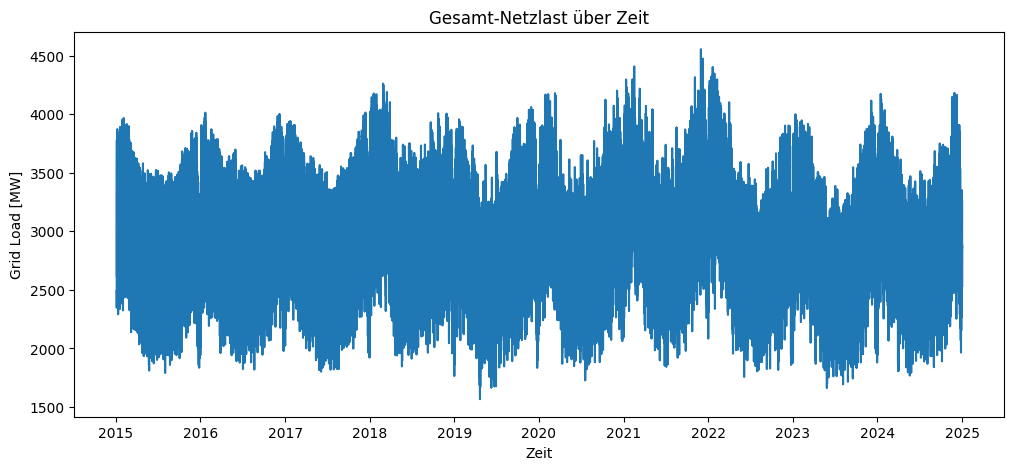

In [3]:
plt.figure(figsize=(12,5))
plt.plot(df['Datetime'], df['Grid Load'], color='tab:blue')
plt.title("Gesamt-Netzlast über Zeit")
plt.xlabel("Zeit")
plt.ylabel("Grid Load [MW]")
plt.show()

/var/folders/gx/jq3twtpj4qgc5xg8wp65w1x00000gn/T/ipykernel_31280/2823236529.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DayOfWeek', y='Power', data=df,


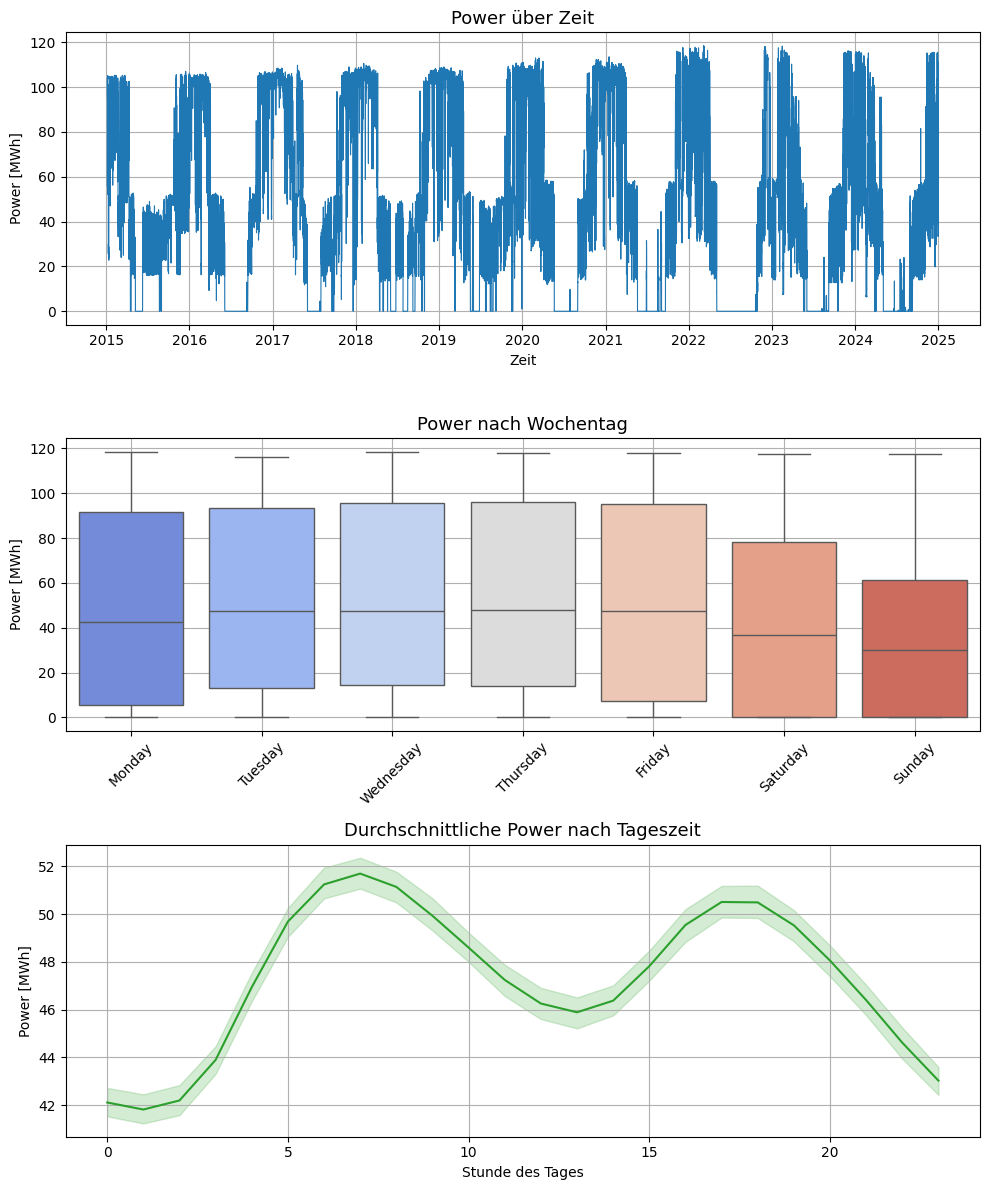

In [4]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
plt.subplots_adjust(hspace=0.5) 

axes[0].plot(df['Datetime'], df['Power'], color='tab:blue', linewidth=0.8)
axes[0].set_title("Power über Zeit", fontsize=13)
axes[0].set_xlabel("Zeit")
axes[0].set_ylabel("Power [MWh]")
axes[0].grid()

df['DayOfWeek'] = df['Datetime'].dt.day_name()
sns.boxplot(x='DayOfWeek', y='Power', data=df,
            order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
            palette='coolwarm', ax=axes[1])
axes[1].set_title("Power nach Wochentag", fontsize=13)
axes[1].set_xlabel("")
axes[1].set_ylabel("Power [MWh]")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid()

sns.lineplot(x='Hour', y='Power', data=df, ax=axes[2], color='tab:green')
axes[2].set_title("Durchschnittliche Power nach Tageszeit", fontsize=13)
axes[2].set_xlabel("Stunde des Tages")
axes[2].set_ylabel("Power [MWh]")
axes[2].grid()

plt.tight_layout()
plt.show()

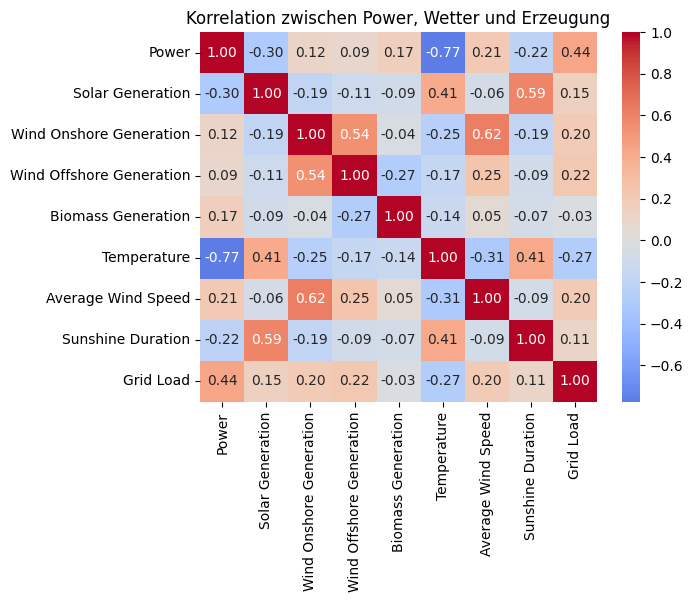

In [5]:
num_cols = ['Power','Solar Generation','Wind Onshore Generation','Wind Offshore Generation',
            'Biomass Generation','Temperature','Average Wind Speed','Sunshine Duration','Grid Load']

corr = df[num_cols].corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", center=0)
plt.title("Korrelation zwischen Power, Wetter und Erzeugung")
plt.show()

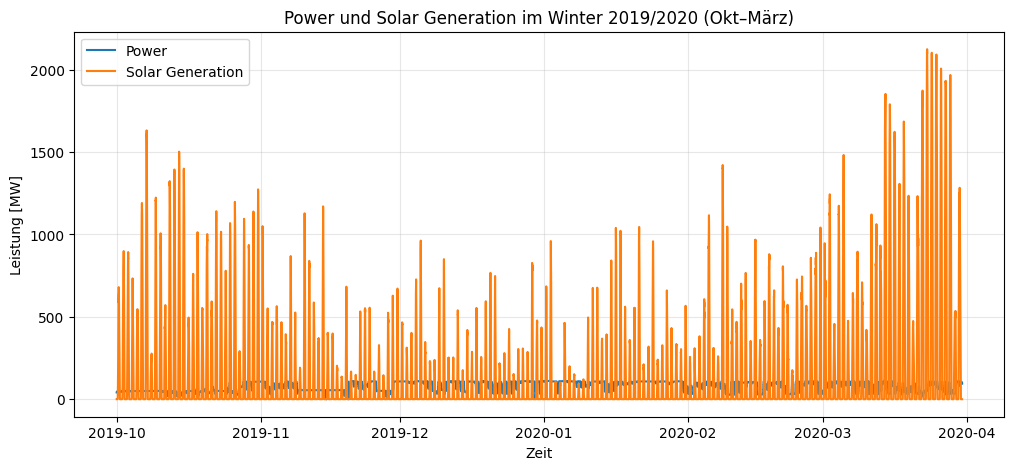

In [12]:
start = '2019-10-01'
end   = '2020-03-31'
temp_df = df[(df['Datetime'] >= start) & (df['Datetime'] <= end)]

# Plot
plt.figure(figsize=(12,5))
plt.plot(temp_df['Datetime'], temp_df['Power'], color='tab:blue', label='Power')
plt.plot(temp_df['Datetime'], temp_df['Solar Generation'], color='tab:orange', label='Solar Generation')
plt.title("Power und Solar Generation im Winter 2019/2020 (Okt–März)")
plt.xlabel("Zeit")
plt.ylabel("Leistung [MW]")
plt.legend()
plt.grid(alpha=0.3)
plt.show()